In [3]:
import sys
sys.path.append("src/utils/")
import evaluate_utils
import text_processing_utils
import re, os
import glob
import time
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

/Users/emilbiju/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
logs_dir = os.environ.get("LOGS_DIR")
output_paths = [i for i in glob.glob(f"{logs_dir}/**", recursive=True) if os.path.basename(i).startswith("agent_orchestration") and i.endswith("csv")]
one_hour_ago = time.time() - 3600
recently_updated_paths = [path for path in output_paths if os.path.getmtime(path) > one_hour_ago]
recently_updated_paths

[]

In [169]:
metrics_df = pd.read_csv("metrics.csv")
for path in recently_updated_paths:
    path_match = re.search(r'agent_orchestration_output_planner_(.+?)_temp([0-9.]+)_executor_(.+?)_temp([0-9.]+)', path.split('/')[1])
    planner_model, planner_temp, executor_model, executor_temp = path_match.group(1), float(path_match.group(2)), path_match.group(3), float(path_match.group(4))
    dataset_name, test_subset = path.split('/')[2].split("_")[0], path.split('/')[2].split("_")[1]
    res_df = pd.read_csv(path)
    accuracy, num_problems, num_problems_without_final_answer, _ = evaluate_utils.get_eval_metrics(res_df)
    
    row_filter = ((metrics_df["PlannerModel"] == planner_model) & (metrics_df["PlannerTemp"] == planner_temp) & (metrics_df["ExecutorModel"] == executor_model) & (metrics_df["ExecutorTemp"] == executor_temp) & (metrics_df["DatasetName"] == dataset_name) & (metrics_df["SubsetName"] == test_subset))
    if metrics_df[row_filter].empty:
        metrics_df = pd.concat([metrics_df, pd.DataFrame([{"PlannerModel": planner_model, "PlannerTemp": planner_temp, "ExecutorModel": executor_model, "ExecutorTemp": executor_temp,
            "DatasetName": dataset_name, "SubsetName": test_subset, "Accuracy": accuracy, "NumProblemsAttempted": num_problems, "NumProblemsIncomplete": num_problems_without_final_answer}])], ignore_index=True)     
    else:
        metrics_df.loc[row_filter, ["Accuracy", "NumProblemsAttempted", "NumProblemsIncomplete"]] = [accuracy, num_problems, num_problems_without_final_answer]

metrics_df.to_csv("metrics.csv", index=False)
metrics_df

,PlannerModel,PlannerTemp,ExecutorModel,ExecutorTemp,DatasetName,SubsetName,Accuracy,NumProblemsAttempted,NumProblemsIncomplete
0,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,MATH-500,default,0.863918,488,3
1,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt534,0.1,MATH-500,default,0.852459,490,2
2,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt534,0.1,MATH-500,default,0.880478,504,2
3,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,MATH-500,default,0.879098,500,12
4,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt800,0.1,MATH-500,default,0.862626,500,5
5,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,NotInOpenThoughts-correct,math,0.831990,3996,26
6,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582-Planning-Dagger-Data-Math,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300-Execution-Dagger-Data-Math-think,0.1,MATH-500,default,0.841237,485,0
7,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582-Planning-Dagger-Data-Math,0.6,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300-Execution-Dagger-Data-Math-think,0.6,MATH-500,default,0.833671,493,0
8,zheminh_Qwen2.5-1.5B-Instruct-Planning-Data-Math-Orig-and-Dagger-ckpt800,0.1,zheminh_DeepSeek-R1-Distill-Qwen-1.5B-Execution-Data-Math-Orig-and-Dagger-think-ckpt700,0.1,MATH-500,default,0.591549,498,1
9,zheminh_Qwen2.5-1.5B-Instruct-Planning-Data-Math-Orig-and-Dagger-ckpt800,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt700,0.1,MATH-500,default,0.759036,500,2


In [22]:
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-Merged-Chains-with-prompt-ckpt1200_temp0.6_executor_temp0.6/MATH-500_default"
df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

0.905811623246493 499 0
Invalid trajectory planner_trajectory_test_precalculus_902.txt 
Valid trajectories: 498, Invalid trajectories: 1
Avg. seq count: 2681.0461847389556, Avg. planner contrib: 895.6927710843373, Avg. executor contrib: 1785.3534136546184


In [ ]:
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_temp0.6/MATH-500_default"
df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

0.8957345971563981 211 0
Invalid trajectory planner_trajectory_test_algebra_1082.txt 
Invalid trajectory planner_trajectory_test_algebra_1349.txt 
Invalid trajectory planner_trajectory_test_algebra_1837.txt 
Invalid trajectory planner_trajectory_test_algebra_1937.txt 
Invalid trajectory planner_trajectory_test_algebra_2046.txt 
Invalid trajectory planner_trajectory_test_algebra_2058.txt 
Invalid trajectory planner_trajectory_test_algebra_2193.txt 
Invalid trajectory planner_trajectory_test_algebra_2214.txt 
Invalid trajectory planner_trajectory_test_algebra_2517.txt 
Invalid trajectory planner_trajectory_test_algebra_2700.txt 
Invalid trajectory planner_trajectory_test_algebra_661.txt 
Invalid trajectory planner_trajectory_test_algebra_733.txt 
Invalid trajectory planner_trajectory_test_algebra_873.txt 
Invalid trajectory planner_trajectory_test_algebra_892.txt 
Invalid trajectory planner_trajectory_test_algebra_972.txt 
Invalid trajectory planner_trajectory_test_counting_and_probabili

In [ ]:
import os
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_1kp_1ke_best/MATH-500_default"
tokens_all = []
for filename in os.listdir(folder_path):
    if not filename.endswith(".txt"):
        continue
    traj = text_processing_utils.read_file_as_string(os.path.join(folder_path, filename))
    traj = traj.split("</Question>")[1].strip()
    tokens = evaluate_utils.count_tokens(traj)
    tokens_all.append(tokens)

In [6]:
import numpy as np
np.mean(tokens_all)

3622.556

In [3]:
df=pd.read_csv("/Users/emilbiju/Downloads/agent_orchestration_output_planner_MrezaPRZ_DeepSeek-R1-Distill-Qwen-7B-Instruct_temp0.2_executor_MrezaPRZ_DeepSeek-R1-Distill-Qwen-7B-Instruct_temp0.2/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.892, 500, 0)

In [113]:
df = pd.read_csv("logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1_maxlen1000_maxphases12/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df1 = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.8897795591182365, 499, 0)

In [138]:
df = pd.read_csv("logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.8611670020120724, 497, 0)

## here

In [58]:
folder_path = "logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-RFT-R1-Distill-ckpt400/aime_2024_default/"
df = pd.read_csv(os.path.join(folder_path, "base_model_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)


nan 26 26


In [46]:
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt700_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt700_temp0.6/MATH-500_default"
df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

0.906 500 0
Invalid trajectory planner_trajectory_test_counting_and_probability_525.txt 
Invalid trajectory planner_trajectory_test_counting_and_probability_71.txt 
Invalid trajectory planner_trajectory_test_precalculus_117.txt 
Valid trajectories: 497, Invalid trajectories: 3
Avg. seq count: 2528.154929577465, Avg. planner contrib: 789.7686116700202, Avg. executor contrib: 1738.3863179074447


In [51]:
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt300_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt300_temp0.6/aime_2024_default"
df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

0.35714285714285715 28 0
Invalid trajectory planner_trajectory_62.txt 
Valid trajectories: 27, Invalid trajectories: 1
Avg. seq count: 6065.925925925926, Avg. planner contrib: 1279.5555555555557, Avg. executor contrib: 4786.37037037037


In [56]:
folder_path = "logs2_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt300_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Merged-Chains-ckpt300_temp0.6/aime_2024_default"
df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

0.4482758620689655 29 0
Valid trajectories: 29, Invalid trajectories: 0
Avg. seq count: 6085.793103448276, Avg. planner contrib: 2823.1724137931033, Avg. executor contrib: 3262.6206896551726


In [45]:
folder_path = "logs/trajectory_data/OpenThoughts-correct_math"
# df = pd.read_csv(os.path.join(folder_path, "agent_orchestration_output.csv"))
# accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
# print(accuracy, num_problems, num_problems_without_final_answer)
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)

Valid trajectories: 1981, Invalid trajectories: 0
Avg. seq count: 1781.700656234225, Avg. planner contrib: 677.6824835941444, Avg. executor contrib: 1104.0181726400808


In [ ]:
import re

def extract_last_phase(s):
    pattern = r"</Execution_(\d+)>\n\n<Final_answer>"
    match = re.search(pattern, s)
    if match:
        return int(match.group(1))
    else:
        return None

last_phase = []
for file in os.listdir("logs/trajectory_data/OpenThoughts-correct_olympiads"):
    if file.endswith(".txt"):
        with open(os.path.join("logs/trajectory_data/OpenThoughts-correct_olympiads", file), "r") as f:
            s = f.read()
            last_phase.append(extract_last_phase(s))

In [43]:
len(last_phase)

2730

Text(0.5, 1.0, 'After merging chains - Olympiad')

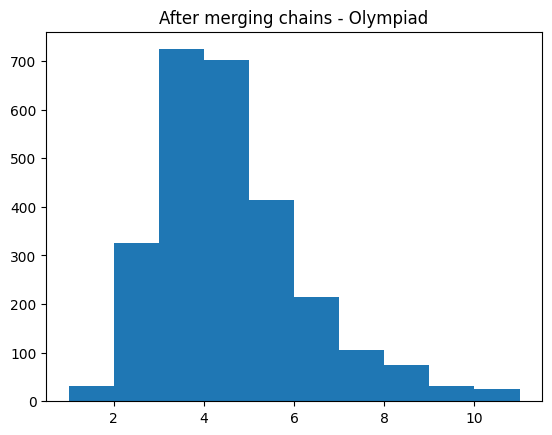

In [41]:
plt.hist(last_phase)
plt.title("After merging chains - Olympiad")

Text(0.5, 1.0, 'Before merging chains - Olympiad')

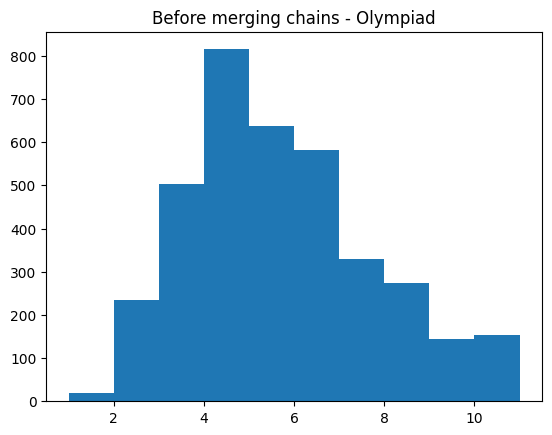

In [39]:
plt.hist(last_phase)
plt.title("Before merging chains - Olympiad")


In [56]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400/MATH-500_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.9536842105263158, 475, 0)

In [57]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400/aime_2024_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

/Users/emilbiju/Downloads/LLMVerification/agentic_r1_v3_git_repo_clone/factuality-verification/src/utils/evaluate_utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_complete["IsCorrect"] = res_df_complete.apply(lambda x: use_math_verify(x["TrueFinalAnswer"], x["PredictedFinalAnswer"]), axis=1)


(0.8571428571428571, 28, 14)

In [58]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt600/MATH-500_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.9105691056910569, 492, 0)

In [50]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt600/aime_2024_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.8, 15, 0)

In [50]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.916, 500, 0)

In [71]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt800/MATH-500_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

/Users/emilbiju/Downloads/LLMVerification/agentic_r1_v3_git_repo_clone/factuality-verification/src/utils/evaluate_utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_complete["IsCorrect"] = res_df_complete.apply(lambda x: use_math_verify(x["TrueFinalAnswer"], x["PredictedFinalAnswer"]), axis=1)


(0.9294117647058824, 497, 72)

In [68]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt800/aime_2024_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

/Users/emilbiju/Downloads/LLMVerification/agentic_r1_v3_git_repo_clone/factuality-verification/src/utils/evaluate_utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_complete["IsCorrect"] = res_df_complete.apply(lambda x: use_math_verify(x["TrueFinalAnswer"], x["PredictedFinalAnswer"]), axis=1)


(0.6923076923076923, 29, 16)

In [72]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt800_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt800_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.892, 500, 0)

In [73]:
df = pd.read_csv("logs2_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.898, 500, 0)

In [54]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/aime_2024_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.4666666666666667, 30, 0)

In [51]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.8902439024390244, 164, 0)

In [52]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.8909090909090909, 165, 0)

In [ ]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.896551724137931, 203, 0)

In [68]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.9341317365269461, 167, 0)

In [95]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.9249492900608519, 493, 0)

In [113]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.924, 500, 0)

In [134]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.894, 500, 0)

In [135]:
df = pd.read_csv("logs2_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.876, 500, 0)

In [5]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.916, 500, 0)

In [112]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.6/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

(0.9238900634249472, 473, 0)

In [23]:
df = pd.read_csv("logs4_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1/MATH-500_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)

seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts("logs4_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1/MATH-500_default")


0.9 500 0
Invalid trajectory planner_trajectory_test_algebra_2700.txt 
Invalid trajectory planner_trajectory_test_counting_and_probability_181.txt 
Invalid trajectory planner_trajectory_test_intermediate_algebra_1350.txt 
Valid trajectories: 497, Invalid trajectories: 3
Avg. seq count: 2705.3098591549297, Avg. planner contrib: 1031.9899396378269, Avg. executor contrib: 1673.3199195171026


In [110]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6/aime_2024_default_5ke_2kp/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)

seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6/aime_2024_default_5ke_2kp")


0.4666666666666667 30 0
Valid trajectories: 30, Invalid trajectories: 0
Avg. seq count: 7163.4, Avg. planner contrib: 1419.6, Avg. executor contrib: 5743.8


In [1]:
folder_path = "logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6/aime_2024_default/"
df = pd.read_csv(folder_path+"agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)

seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts(folder_path)


NameError: name 'pd' is not defined

In [10]:
seq_token_count_dict

{'planner_trajectory_60.txt': [4072, 683, 3389],
 'planner_trajectory_63.txt': [8950, 1842, 7108],
 'planner_trajectory_64.txt': [6024, 1522, 4502],
 'planner_trajectory_65.txt': [7897, 1228, 6669],
 'planner_trajectory_66.txt': [4968, 1658, 3310],
 'planner_trajectory_67.txt': [4555, 692, 3863],
 'planner_trajectory_68.txt': [5135, 1524, 3611],
 'planner_trajectory_69.txt': [1988, 961, 1027],
 'planner_trajectory_70.txt': [12587, 2073, 10514],
 'planner_trajectory_71.txt': [3988, 980, 3008],
 'planner_trajectory_72.txt': [4611, 708, 3903],
 'planner_trajectory_73.txt': [7644, 3070, 4574],
 'planner_trajectory_74.txt': [11159, 2368, 8791],
 'planner_trajectory_75.txt': [6277, 593, 5684],
 'planner_trajectory_76.txt': [4169, 1194, 2975],
 'planner_trajectory_77.txt': [9906, 2428, 7478],
 'planner_trajectory_78.txt': [5716, 1865, 3851],
 'planner_trajectory_79.txt': [5903, 2752, 3151],
 'planner_trajectory_80.txt': [7448, 2977, 4471],
 'planner_trajectory_82.txt': [10623, 2977, 7646],
 '

In [7]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-RFT-R1-Distill-ckpt400/aime_2024_default/base_model_output.csv")
df["ModelResponse"].apply(lambda x: evaluate_utils.count_tokens(x)).mean(), len(df)

(6351.884615384615, 26)

In [6]:
df = pd.read_csv("logs_base_model/base_model_output_zheminh_DeepSeek-R1-Distill-Qwen-7B-RFT-R1-Distill-ckpt400/amc23_default/base_model_output.csv")
df["ModelResponse"].apply(lambda x: evaluate_utils.count_tokens(x)).mean(), len(df)

(3479.175, 40)

In [130]:
df["PredAns"] = None
for i in range(len(df)):
    try:
        df.loc[i, "PredAns"] = evaluate_utils.remove_boxed(evaluate_utils.last_boxed_only_string(df.loc[i, "ModelResponse"]))
    except:
        pass

In [5]:
df = pd.read_csv("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6/amc23_default/agent_orchestration_output.csv")
accuracy, num_problems, num_problems_without_final_answer, res_df = evaluate_utils.get_eval_metrics(df)
print(accuracy, num_problems, num_problems_without_final_answer)

seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts("logs_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-MATH-Olympiad-ckpt1200_temp0.6/amc23_default")


0.825 40 0
Valid trajectories: 40, Invalid trajectories: 0
Avg. seq count: 3616.85, Avg. planner contrib: 981.975, Avg. executor contrib: 2634.875


In [139]:
seq_token_count_dict

{'planner_trajectory_0.txt': [937, 587, 350],
 'planner_trajectory_1.txt': [2145, 812, 1333],
 'planner_trajectory_10.txt': [7651, 659, 6992],
 'planner_trajectory_11.txt': [1723, 731, 992],
 'planner_trajectory_12.txt': [3731, 646, 3085],
 'planner_trajectory_13.txt': [4252, 1014, 3238],
 'planner_trajectory_14.txt': [3133, 231, 2902],
 'planner_trajectory_15.txt': [5069, 1632, 3437],
 'planner_trajectory_16.txt': [4844, 841, 4003],
 'planner_trajectory_17.txt': [1802, 701, 1101],
 'planner_trajectory_18.txt': [1955, 617, 1338],
 'planner_trajectory_19.txt': [1581, 257, 1324],
 'planner_trajectory_2.txt': [1041, 388, 653],
 'planner_trajectory_20.txt': [8315, 4460, 3855],
 'planner_trajectory_21.txt': [1181, 429, 752],
 'planner_trajectory_22.txt': [8295, 3216, 5079],
 'planner_trajectory_23.txt': [1950, 1083, 867],
 'planner_trajectory_25.txt': [1260, 768, 492],
 'planner_trajectory_26.txt': [2462, 1109, 1353],
 'planner_trajectory_27.txt': [3837, 1029, 2808],
 'planner_trajectory_28

In [94]:
seq_token_count_dict, large_files = evaluate_utils.get_seq_token_counts("logs4_full_trajectory/agent_orchestration_output_planner_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Trajectory-Data-Math-ckpt400_temp0.1/MATH-500_default")


Invalid trajectory planner_trajectory_test_algebra_2700.txt 
Invalid trajectory planner_trajectory_test_counting_and_probability_181.txt 
Invalid trajectory planner_trajectory_test_intermediate_algebra_1350.txt 
Valid trajectories: 497, Invalid trajectories: 3
Avg. seq count: 2705.3098591549297, Avg. planner contrib: 1031.9899396378269, Avg. executor contrib: 1673.3199195171026


In [20]:
res_df[res_df["IsCorrect"]==False][['ProblemIdx', 'IsCorrect']]

,ProblemIdx,IsCorrect
15,test_intermediate_algebra_1197,False
16,test_precalculus_990,False
17,test_algebra_1098,False
28,test_geometry_434,False


In [137]:
len(res_df[res_df["IsCorrect"]==True])

428

In [85]:
(437+9)/489

0.9120654396728016

In [139]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)


In [59]:
res_df[res_df["IsCorrect"]==False][["ProblemIdx", "PredictedFinalAnswer", "TrueFinalAnswer"]]

,ProblemIdx,PredictedFinalAnswer,TrueFinalAnswer
9,test_number_theory_737,561,284
16,test_intermediate_algebra_1197,8,\frac{3}{56}
56,test_precalculus_1199,\dfrac{\pi}{2},\pi
68,test_number_theory_516,2516_{8},2516_8
96,test_prealgebra_1646,70^\circ,80
97,test_intermediate_algebra_515,y = \frac{4}{3},\frac43
99,test_precalculus_1146,\dfrac{25}{16},\frac{35}{64}
100,test_geometry_183,135,145^\circ
106,test_intermediate_algebra_662,7,1 \pm \sqrt{19}
107,test_intermediate_algebra_1898,-24,-5


In [88]:
from datasets import load_dataset
ds_openai = load_dataset("openai/gsm8k", 'main', split='test')
ds_calc = load_dataset("MU-NLPC/Calc-gsm8k", 'original-splits', split='test')

In [89]:
ds_openai

Dataset({
    features: ['question', 'answer'],
    num_rows: 1319
})

In [90]:
ds_calc

Dataset({
    features: ['id', 'question', 'chain', 'result', 'result_float'],
    num_rows: 1319
})

In [5]:
df = pd.read_csv("/Users/emilbiju/Downloads/base_model_output_gsm8k_DeepSeek-R1-Distill-Qwen-7B.csv")
len(df)

1319

In [6]:
import re

def extract_final_answer_gsm8k(input_string):
    match = re.search(r'####\s*(.+)$', input_string)
    if match:
        return match.group(1)
    return None

In [7]:
df.rename(columns={'TrueFinalAnswer': 'chain'}, inplace=True)
df["TrueFinalAnswer"] = df["chain"].apply(lambda x:extract_final_answer_gsm8k(x))

In [8]:
accuracy, num_problems, num_problems_without_final_answer, _ = evaluate_utils.get_eval_metrics(df)
accuracy, num_problems, num_problems_without_final_answer

/Users/emilbiju/Downloads/LLMVerification/agentic_r1_v3_git_repo_clone/factuality-verification/src/utils/evaluate_utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_complete["IsCorrect"] = res_df_complete.apply(lambda x: use_math_verify(x["TrueFinalAnswer"], x["PredictedFinalAnswer"]), axis=1)


(0.8468606431852986, 1319, 13)

In [24]:
count=0
folder_path = "logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1/MATH-500_default"
for file in os.listdir(folder_path):
    if ".txt" not in file:
        continue
    else:
        file_content = text_processing_utils.read_file_as_string(os.path.join(folder_path, file))
        if "<Plan_8>" in file_content:
            count+=1
count

0

In [ ]:
# # Delete files with incomplete answers
# import pandas as pd
# df = pd.read_csv("logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1/MATH-500_default/agent_orchestration_output.csv")
# del df["PlannerTrajectory"], df["Solution"]
# problem_ids = list(df[df["PredictedFinalAnswer"].isna()]["ProblemIdx"])
# for problem_id in problem_ids:
#     trajectory_path = f"logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1/MATH-500_default/planner_trajectory_{problem_id}.txt"
#     os.remove(trajectory_path)

In [52]:
metrics_df = pd.read_csv("metrics.csv")
for path in recently_updated_paths:
    path_match = re.search(r'agent_orchestration_output_planner_(.+?)_temp([0-9.]+)_executor_(.+?)_temp([0-9.]+)', path.split('/')[1])
    planner_model, planner_temp, executor_model, executor_temp = path_match.group(1), float(path_match.group(2)), path_match.group(3), float(path_match.group(4))
    dataset_name, test_subset = path.split('/')[2].split("_")[0], path.split('/')[2].split("_")[1]
    res_df = pd.read_csv(path)
    accuracy, num_problems, num_problems_without_final_answer, _ = evaluate_utils.get_eval_metrics(res_df)
    
    row_filter = ((metrics_df["PlannerModel"] == planner_model) & (metrics_df["PlannerTemp"] == planner_temp) & (metrics_df["ExecutorModel"] == executor_model) & (metrics_df["ExecutorTemp"] == executor_temp) & (metrics_df["DatasetName"] == dataset_name) & (metrics_df["SubsetName"] == test_subset))
    if metrics_df[row_filter].empty:
        metrics_df = pd.concat([metrics_df, pd.DataFrame([{"PlannerModel": planner_model, "PlannerTemp": planner_temp, "ExecutorModel": executor_model, "ExecutorTemp": executor_temp,
            "DatasetName": dataset_name, "SubsetName": test_subset, "Accuracy": accuracy, "NumProblemsAttempted": num_problems, "NumProblemsIncomplete": num_problems_without_final_answer}])], ignore_index=True)     
    else:
        metrics_df.loc[row_filter, ["Accuracy", "NumProblemsAttempted", "NumProblemsIncomplete"]] = [accuracy, num_problems, num_problems_without_final_answer]

metrics_df.to_csv("metrics.csv", index=False)
metrics_df

,PlannerModel,PlannerTemp,ExecutorModel,ExecutorTemp,DatasetName,SubsetName,Accuracy,NumProblemsAttempted,NumProblemsIncomplete
0,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,MATH-500,default,0.863918,488,3
1,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt534,0.1,MATH-500,default,0.852459,490,2
2,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt534,0.1,MATH-500,default,0.880478,504,2
3,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,MATH-500,default,0.879098,500,12
4,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt800,0.1,MATH-500,default,0.862626,500,5
5,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300,0.1,NotInOpenThoughts-correct,math,0.831990,3996,26
6,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582-Planning-Dagger-Data-Math,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300-Execution-Dagger-Data-Math-think,0.1,MATH-500,default,0.841237,485,0
7,zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582-Planning-Dagger-Data-Math,0.6,zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300-Execution-Dagger-Data-Math-think,0.6,MATH-500,default,0.833671,493,0
8,zheminh_Qwen2.5-1.5B-Instruct-Planning-Data-Math-Orig-and-Dagger-ckpt800,0.1,zheminh_DeepSeek-R1-Distill-Qwen-1.5B-Execution-Data-Math-Orig-and-Dagger-think-ckpt700,0.1,MATH-500,default,0.591549,498,1
9,zheminh_Qwen2.5-1.5B-Instruct-Planning-Data-Math-Orig-and-Dagger-ckpt800,0.1,zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt700,0.1,MATH-500,default,0.759036,500,2


In [46]:
df = pd.read_csv("logs_base_model/base_model_output_Qwen_Qwen3-8B_maxtokens10000/MATH-500_default/base_model_output.csv")
accuracy, num_problems, num_problems_without_final_answer, _ = evaluate_utils.get_eval_metrics(df)

In [48]:
accuracy, num_problems, num_problems_without_final_answer

(0.9656862745098039, 408, 0)

In [73]:
df=pd.read_csv("logs/agent_orchestration_output_planner_zheminh_Qwen2.5-7B-Instruct-Planning-Data-Math-Orig-and-Dagger-ckpt2075_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-Execution-Data-Math-Orig-and-Dagger-think-ckpt2139_temp0.1/MATH-500_default/agent_orchestration_output.csv")

In [67]:
from datasets import load_dataset

In [74]:
ds1_planner = load_dataset("emilbiju/Planning-Dagger-Data-Math")
ds2_planner = load_dataset("emilbiju/Planning-Data-Math-Full-Soln")

In [75]:
ds1_planner

DatasetDict({
    train: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 846
    })
    test: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 96
    })
})

In [76]:
ds2_planner

DatasetDict({
    train: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 6903
    })
    test: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 738
    })
})

In [77]:
from datasets import concatenate_datasets

# Concatenate train and test splits
ds_combined_train = concatenate_datasets([ds1_planner['train'], ds2_planner['train']])
ds_combined_test = concatenate_datasets([ds1_planner['test'], ds2_planner['test']])

# Combine into a single DatasetDict
ds_combined = {
    'train': ds_combined_train,
    'test': ds_combined_test
}

In [78]:
from datasets import DatasetDict

# Shuffle train and test splits
ds_combined_shuffled = DatasetDict({
    'train': ds_combined['train'].shuffle(seed=42),
    'test': ds_combined['test'].shuffle(seed=42)
})

ds_combined_shuffled

DatasetDict({
    train: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 7749
    })
    test: Dataset({
        features: ['ProblemIdx', 'SystemPrompt', 'UserPrompt', 'ExpectedOutput', 'FinalAnswer', 'Phase', '__index_level_0__', 'messages'],
        num_rows: 834
    })
})

In [79]:
ds_combined_shuffled.push_to_hub("emilbiju/Planning-Data-Math-Orig-and-Dagger", "math")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/emilbiju/Planning-Data-Math-Orig-and-Dagger/commit/1e5ffbc385a67f74313d314a2df8b139fd17d831', commit_message='Upload dataset', commit_description='', oid='1e5ffbc385a67f74313d314a2df8b139fd17d831', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/emilbiju/Planning-Data-Math-Orig-and-Dagger', endpoint='https://huggingface.co', repo_type='dataset', repo_id='emilbiju/Planning-Data-Math-Orig-and-Dagger'), pr_revision=None, pr_num=None)

In [2]:
from engine import get_engine, invoke_engine
engine = get_engine(model_name = "DeepSeek-R1", temperature=0.1)

/Users/emilbiju/anaconda3/lib/python3.10/site-packages/langchain_together/llms.py:89: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


In [42]:
from datasets import load_dataset
import os
import pandas as pd

ds = load_dataset("HuggingFaceH4/MATH-500", "default")
ds = ds['test']
if "/" in ds['unique_id'][0]:
    ds = ds.map(lambda x: {'unique_id2' : os.path.splitext(os.path.basename(x['unique_id']))[0]})

df = ds.to_pandas()
non_unique_rows = df[df.duplicated(subset='unique_id2', keep=False)]
df_unique = df.drop_duplicates(subset='unique_id2', keep='first')

In [44]:
dir_path = "logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300_temp0.1/MATH-500_default"
for i in range(len(df_unique)):
    try:
        os.rename(os.path.join(dir_path, f"planner_trajectory_{df_unique['unique_id2'].iloc[i]}.txt"), os.path.join(dir_path, f"planner_trajectory_{df_unique['unique_id'].iloc[i].split('.')[0].replace('/', '_')}.txt"))
    except Exception as e:
        print(e)
        pass

[Errno 2] No such file or directory: 'logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300_temp0.1/MATH-500_default/planner_trajectory_1646.txt' -> 'logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300_temp0.1/MATH-500_default/planner_trajectory_test_prealgebra_1646.txt'
[Errno 2] No such file or directory: 'logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300_temp0.1/MATH-500_default/planner_trajectory_880.txt' -> 'logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt200_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300_temp0.1/MATH-500_default/planner_trajectory_test_geometry_880.txt'
[Errno 2

In [32]:
df = pd.read_csv("logs/agent_orchestration_output_planner_zheminh_Planning-Data-Math-Full-Soln-Qwen2.5-7B-Instruct-ckpt582-Planning-Dagger-Data-Math_temp0.1_executor_zheminh_DeepSeek-R1-Distill-Qwen-7B-ckpt300-Execution-Dagger-Data-Math-think_temp0.1/MATH-500_default/agent_orchestration_output.csv")

In [34]:
accuracy, num_problems, num_problems_without_final_answer, df_new = evaluate_utils.get_eval_metrics(df)

In [38]:
df_new[df_new["IsCorrect"]==False][["ProblemIdx",	"PredictedFinalAnswer",	"TrueFinalAnswer"]]

,ProblemIdx,PredictedFinalAnswer,TrueFinalAnswer
23,test_intermediate_algebra_1197,\frac{1}{12},\frac{3}{56}
29,test_counting_and_probability_525,72,144
60,test_number_theory_1055,29,203
66,test_intermediate_algebra_1454,10\sqrt{13} + 30\sqrt{2},70 \sqrt{2}
69,test_intermediate_algebra_47,1,"(-2,1)"
73,test_intermediate_algebra_2046,28,2
83,test_intermediate_algebra_1849,999,501
88,test_prealgebra_1646,130^\circ,80
89,test_precalculus_1300,\begin{pmatrix} -\dfrac{1}{3} \\ \dfrac{2}{3} \\ \dfrac{5}{3} \end{pmatrix},\begin{pmatrix} -1/3 \\ 2/3 \\ 5/3 \end{pmatrix}
96,test_algebra_892,3,2


In [38]:
os.path.splitext("abc/def.sdf")

('abc/def', '.sdf')

In [6]:
res = invoke_engine(engine, prompt = "What is the sum of 1st 10 natural numbers?\n<think>\nOkay, so I need to find the sum of the first 10 natural numbers. Let me think about ")

ValueError: Together received an invalid payload: {
  "id": "noxU7aa-4yUbBN-92be4e710cfb6426",
  "error": {
    "message": "Unable to access model DeepSeek-R1. Please visit https://api.together.ai/models to view the list of supported models.",
    "type": "invalid_request_error",
    "param": null,
    "code": "model_not_available"
  }
}

In [41]:
":5".split(":")

['', '5']

In [24]:
from langchain_together import Together, ChatTogether

model = Together(model="mistralai/Mixtral-8x7B-Instruct-v0.1")

/Users/emilbiju/anaconda3/lib/python3.10/site-packages/langchain_together/llms.py:89: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


In [25]:
from concurrent.futures import ThreadPoolExecutor, TimeoutError as FuturesTimeoutError

def invoke_engine(engine, prompt, **kwargs):
    """
    Simple wrapper to invoke a language model engine and return its response.

    Args:
        engine: The language model engine to use
        prompt: The input prompt to send to the model
        **kwargs: Additional keyword arguments for the model invocation

    Returns:
        str: The model's response text. For gemini-1.5-pro, returns the raw response object;
             for other models, returns just the content
    """
    
    
    max_retries = 3
    base_wait = 5  # Start with 1 second
    max_wait = 60  # Max wait of 1 minute
    timeout = 180
    
    model = engine.model if hasattr(engine, 'model') else engine.model_name
    for attempt in range(max_retries):
        try:            
            with ThreadPoolExecutor(max_workers=10) as executor:
                future = executor.submit(lambda: (
                    engine.invoke(prompt, **kwargs).content 
                    if "gemini" not in model and "R1-Distill" not in model and "mistralai" not in model
                    else engine.invoke(prompt, **kwargs)
                ))
                
                try:
                    result = future.result(timeout=timeout)
                    return result
                except FuturesTimeoutError:
                    raise TimeoutError(f"Request timed out after {timeout} seconds")
        except Exception as e:
            print(e)
            if attempt == max_retries - 1:
                raise  # Re-raise the exception on the last attempt
            
            # Calculate wait time with exponential backoff, capped at max_wait
            wait_time = min(base_wait * (2 ** attempt), max_wait)
            time.sleep(wait_time)

In [26]:
model.invoke("What is the sum of 1st 10 natural numbers? The first 10 natural numbers are: 1,2,3")

',4,5,6,7,8,9,10 Our goal is to find the sum of the 10 numbers as defined by the formula S=n(n+1)/2.\n\nHere, n=10 S=10(10+1)/2 = 10(11)/2 = 110/2 = 55.\n\nAnswer: The sum of the first 10 natural numbers is 55.'

In [5]:
invoke_engine(engine, prompt="What is the sum of 1st 10 natural numbers? The first 10 natural numbers are: 1,2,3")

Together received an invalid payload: {
  "id": "noxYSTm-4yUbBN-92be630b595dfb34",
  "error": {
    "message": "Unable to access model DeepSeek-R1. Please visit https://api.together.ai/models to view the list of supported models.",
    "type": "invalid_request_error",
    "param": null,
    "code": "model_not_available"
  }
}


KeyboardInterrupt: 

In [15]:
from langchain_together import Together

model = Together(model="deepseek-ai/DeepSeek-R1")

/Users/emilbiju/anaconda3/lib/python3.10/site-packages/langchain_together/llms.py:89: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


In [16]:
model.invoke("What is the sum of 1st 10 natural numbers? The first 10 natural numbers are: 1,2,3")

Exception: Together Server: Error 500

In [18]:
from langchain_together import Together

# Initialize the Together client with DeepSeek-R1 model
model = Together(
    model="deepseek-ai/DeepSeek-R1",  # Specify the DeepSeek-R1 model
)

# Define the prompt
prompt = "Explain the concept of reinforcement learning in simple terms."

# Invoke the model for completions
response = model.invoke(prompt)

# Print the response from DeepSeek-R1
print(response)


/Users/emilbiju/anaconda3/lib/python3.10/site-packages/langchain_together/llms.py:89: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


Exception: Together Server: Error 500

In [19]:
inp_str = """What is the sum of 1st 10 natural numbers?\n<think>\nOkay, so I need to find the sum of the first 10 natural numbers. Let me think about how to approach this. Natural numbers are the numbers we use for counting, right? So starting from 1, 2, 3, all the way up to 10. The question is asking for the sum of these numbers. 

Hmm, I remember there's a formula for the sum of an arithmetic series. Since natural numbers are consecutive and each number increases by 1, this is an arithmetic sequence where the common difference is 1. The formula for the sum of the first n terms of an arithmetic sequence is S_n = n/2 * (a_1 + a_n), where n is the number of terms, a_1 is the first term, and a_n is the last term. 

Let me verify if that's correct. So in this case, n is 10 because we're looking at the first 10 numbers. The first term a_1 is 1, and the last term a_n is 10. Plugging these into the formula: S_10 = 10/2 * (1 + 10). That simplifies to 5 * 11, which is 55. So the sum should be 55. 

Wait, but maybe I should double-check by adding them manually to make sure I didn't make a mistake. Let's see: 1 + 2 is 3, plus 3 is 6, plus 4 is 10, plus 5 is 15, plus 6 is 21, plus 7 is 28, plus 8 is 36, plus 9 is 45, plus 10 is 55. Yep, that matches. 

Alternatively, I remember there's another formula for the sum of the first n natural numbers, which is n(n + 1)/2. Let me try that too. For n = 10, that would be 10*11/2 = 110/2 = 55. Same result. 

So both methods give me"""

In [27]:
!together completions "{inp_str}" --model deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free

<think>
 55, which makes me confident that the sum is indeed 55. I think that's the answer. 

Just to make sure I didn't confuse the formula with something else, let me recall where it comes from. The formula n(n + 1)/2 is derived from the idea of pairing numbers. If you write the sequence forwards and backwards and add them together, each pair sums to n + 1, and there are n/2 such pairs. So for 10 numbers, that's 5 pairs each summing to 11, which is 5*11=55. That makes sense. 

I think I've covered all the bases here. I used two different methods to calculate the sum, both leading to the same result, and I even thought through why the formula works. So I'm pretty sure the sum of the first 10 natural numbers is 55.
</think>

The sum of the first 10 natural numbers can be calculated using the formula for the sum of an arithmetic series. 

Using the formula \( S_n = \frac{n(n + 1)}{2} \), where \( n = 10 \):

\[
S_{10} = \frac{10 \times 11}{2} = \frac{110}{2} = 55
\]

Thus, the sum of th

In [63]:
def get_final_answer_line(solution):
    solution_lines = text_processing_utils.split_into_sentences(solution)
    solution_lines = [line for line in solution_lines if line.strip()!=""]
    solution_line_with_boxed = [(line_number, line) for line_number, line in enumerate(solution_lines) if "boxed" in line]
    if len(solution_line_with_boxed)>0:
        line_number, line = solution_line_with_boxed[-1]
        return "\n".join(solution_lines[line_number:]).strip()
    else:
        return "\n".join(solution_lines[-2:]).strip()
    
def last_boxed_only_string(string: str):
    idx = string.rfind("\\boxed")
    if "\\boxed " in string:
        return "\\boxed " + string.split("\\boxed ")[-1].split("$")[0]
    if idx < 0:
        idx = string.rfind("\\fbox")
        if idx < 0:
            return None

    i = idx
    right_brace_idx = None
    num_left_braces_open = 0
    while i < len(string):
        if string[i] == "{":
            num_left_braces_open += 1
        if string[i] == "}":
            num_left_braces_open -= 1
            if num_left_braces_open == 0:
                right_brace_idx = i
                break
        i += 1

    if right_brace_idx is None:
        retval = None
    else:
        retval = string[idx : right_brace_idx + 1]

    return retval

def remove_boxed(s: str) -> str:
    if "\\boxed " in s:
        left = "\\boxed "
        assert s[: len(left)] == left
        return s[len(left) :]

    left = "\\boxed{"

    assert s[: len(left)] == left
    assert s[-1] == "}"

    return s[len(left) : -1]


In [5]:
from datasets import load_dataset

In [16]:
ds = load_dataset("emilbiju/OpenThoughts-correct", "math")

In [17]:
ds=ds["train"]

In [18]:
ds_math = load_dataset("nlile/hendrycks-MATH-benchmark", "default")
ds_math = ds_math["train"]

In [19]:
ds

Dataset({
    features: ['source', 'problem', 'solution', 'generated_token_count', 'correct', 'domain', 'thought', 'ProblemIdx'],
    num_rows: 6263
})

In [20]:
ds_math

Dataset({
    features: ['problem', 'solution', 'answer', 'subject', 'level', 'unique_id'],
    num_rows: 12000
})

In [21]:
import datasets

In [ ]:
# Convert ds and ds_math to pandas DataFrames
ds_df = ds.to_pandas()
ds_math_df = ds_math.to_pandas()

# Perform an inner join on the 'problem' column
merged_df = ds_df[['problem', 'correct']].merge(ds_math_df, on='problem', how='right')

In [27]:
merged_df

,problem,correct,solution,answer,subject,level,unique_id
0,How many vertical asymptotes does the graph of...,NaN,The denominator of the rational function facto...,2,Algebra,3,test/algebra/1.json
1,"If $5x - 3 = 12$, what is the value of $5x + 3$?",NaN,Adding 6 to both sides of $5x - 3 =12$ gives $...,18,Prealgebra,2,test/prealgebra/2002.json
2,Ryan has 3 red lava lamps and 3 blue lava lamp...,NaN,There are $\binom{6}{3}=20$ ways for Ryan to a...,\dfrac{7}{20},Counting & Probability,5,test/counting_and_probability/967.json
3,Alice wants to buy $3$ pounds of veal at the g...,NaN,"Since Alice wants to buy $3$ pounds of veal, w...",1.36,Prealgebra,4,test/prealgebra/2017.json
4,"On the $xy$-plane, the origin is labeled with ...",NaN,"From the M, we can proceed to four different A...",28,Counting & Probability,5,test/counting_and_probability/990.json
...,...,...,...,...,...,...,...
11995,The product of two positive integers plus thei...,True,Let our numbers be $a$ and $b$ with $a>b.$ The...,19,Algebra,4,train/algebra/815.json
11996,The volume of the box is 240 cubic units where...,True,The prime factorization of 240 is $2^4\cdot3\c...,10,Number Theory,4,train/number_theory/144.json
11997,Let \[f(n) =\n\begin{cases}\nn^2-1 & \text{ if...,True,"Working from the inside out, since $2<4$ we ha...",22,Algebra,2,train/algebra/1959.json
11998,Find the nonconstant polynomial $P(x)$ such th...,True,Let $d$ be the degree of $P(x).$ Then the deg...,x^2 + x,Intermediate Algebra,5,train/intermediate_algebra/188.json


In [36]:
merged_df[merged_df["correct"].notna()]

,problem,correct,solution,answer,subject,level,unique_id
45,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",True,"For the piecewise function to be continuous, t...",0,Algebra,5,train/algebra/0.json
46,What is the area of the triangle bounded by th...,True,[asy]\nsize(200); defaultpen(linewidth(0.8));\...,36,Geometry,3,train/geometry/218.json
47,Twenty-seven increased by twice a number is 39...,True,We are asked to solve $27+2x=39$ for $x$. We ...,6,Prealgebra,1,train/prealgebra/1915.json
48,How many 3-letter words can we make from the l...,True,"There are $4^3$ three letter words from A, B, ...",37,Counting & Probability,4,train/counting_and_probability/24.json
49,When Claire divides her cupcakes into groups o...,True,"If Claire has $N$ cupcakes, we know that $N = ...",71,Number Theory,3,train/number_theory/544.json
...,...,...,...,...,...,...,...
11995,The product of two positive integers plus thei...,True,Let our numbers be $a$ and $b$ with $a>b.$ The...,19,Algebra,4,train/algebra/815.json
11996,The volume of the box is 240 cubic units where...,True,The prime factorization of 240 is $2^4\cdot3\c...,10,Number Theory,4,train/number_theory/144.json
11997,Let \[f(n) =\n\begin{cases}\nn^2-1 & \text{ if...,True,"Working from the inside out, since $2<4$ we ha...",22,Algebra,2,train/algebra/1959.json
11998,Find the nonconstant polynomial $P(x)$ such th...,True,Let $d$ be the degree of $P(x).$ Then the deg...,x^2 + x,Intermediate Algebra,5,train/intermediate_algebra/188.json


In [33]:
ds_not_in_train = merged_df[merged_df["correct"].isna()]
del ds_not_in_train["correct"]
ds = datasets.Dataset.from_pandas(ds_not_in_train)

In [34]:
ds

Dataset({
    features: ['problem', 'solution', 'answer', 'subject', 'level', 'unique_id', '__index_level_0__'],
    num_rows: 6062
})

In [35]:
ds_not_in_train

,problem,solution,answer,subject,level,unique_id
0,How many vertical asymptotes does the graph of...,The denominator of the rational function facto...,2,Algebra,3,test/algebra/1.json
1,"If $5x - 3 = 12$, what is the value of $5x + 3$?",Adding 6 to both sides of $5x - 3 =12$ gives $...,18,Prealgebra,2,test/prealgebra/2002.json
2,Ryan has 3 red lava lamps and 3 blue lava lamp...,There are $\binom{6}{3}=20$ ways for Ryan to a...,\dfrac{7}{20},Counting & Probability,5,test/counting_and_probability/967.json
3,Alice wants to buy $3$ pounds of veal at the g...,"Since Alice wants to buy $3$ pounds of veal, w...",1.36,Prealgebra,4,test/prealgebra/2017.json
4,"On the $xy$-plane, the origin is labeled with ...","From the M, we can proceed to four different A...",28,Counting & Probability,5,test/counting_and_probability/990.json
...,...,...,...,...,...,...
11954,"The graph of $y=f(x)$ is shown below, with $1$...","If $f(x)=c$ has $6$ solutions, then the horizo...",-7,Algebra,5,train/algebra/1304.json
11959,Krista put 1 cent into her new bank on a Sunda...,The formula for a geometric series is $\frac{a...,\text{Sunday},Algebra,5,train/algebra/627.json
11965,What is the ratio of the area of the shaded sq...,Divide the square into $16$ smaller squares as...,\frac{1}{8},Prealgebra,5,train/prealgebra/241.json
11981,"In the diagram, $D$ and $E$ are the midpoints ...","Since $D$ is the midpoint of $\overline{AB},$ ...",\frac{21}{8},Algebra,3,train/algebra/374.json


In [38]:
ds.push_to_hub("emilbiju/NotInOpenThoughts-correct", "math")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/emilbiju/NotInOpenThoughts-correct/commit/3a8536ed0520ff2dd41cfd2ebcd58606cbe9daae', commit_message='Upload dataset', commit_description='', oid='3a8536ed0520ff2dd41cfd2ebcd58606cbe9daae', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/emilbiju/NotInOpenThoughts-correct', endpoint='https://huggingface.co', repo_type='dataset', repo_id='emilbiju/NotInOpenThoughts-correct'), pr_revision=None, pr_num=None)

In [12]:
import random
SUITS = ['diamonds', 'hearts', 'clubs', 'spades']
RANKS = [str(i) for i in range(2,11)]+['J', 'Q', 'K', 'A']
rank_nums = list(range(2,15))
VALUES =  {RANKS[i]:rank_nums[i] for i in range(len(RANKS))}
class Deck:
    def __init__(self):
        self.cards=[]
        for suit in SUITS:
            for value in RANKS:
                self.cards.append(suit, value)

    def shuffle(self):
        self.cards = random.shuffle(self.cards)


class Card:
    def __init__(self, card):
        self.suit = card[0]
        self.value = VALUES[card[1]]


class Player:
    def __init__(self, name):
        self.name = name
        self.hole_cards = []
        self.amount_bet = 0

In [13]:
from collections import Counter

In [14]:
def is_flush(five_cards):
    possible_suit = five_cards[0].suit
    if all([card.suit==possible_suit for card in five_cards]):
        return True
    
def is_straight(five_cards):
    sorted_cards = sorted([card.value for card in five_cards])
    if set(list(range(sorted_cards[0], sorted_cards[0]+5))).issubset(set(sorted_cards)):
        return sorted_cards[-1]
    if {14,2,3,4,5}.issubset(set(sorted_cards)):
        return 5
    return None

In [ ]:
def evaluate_five_cards(five_cards):
    """
    1. High card
    2. Pair
    3. Two pair
    4. 3 of a kind
    5. Straight
    6. Flush
    7. Full house
    8. 4 of a kind
    9. Straight flush
    """
    five_values = [card.value for card in five_cards]
    five_values = sorted(five_values, reverse=True)
    counts = Counter(five_values)
    counts = counts.most_common()

    if is_flush(five_cards) and is_straight(five_cards):
        return (9, is_straight(five_cards))
    if counts[0][1]==4:
        return (8, counts[0][0], counts[1][0])
    if counts[0][1]==3 and len(counts)>1 and counts[1][1]==2:
        return (7, counts[0][0], counts[1][0])
    if is_flush(five_cards):
        return (6, )+tuple(five_values)
    if is_straight(five_cards):
        return (5, is_straight(five_cards))
    if counts[0][1]==3:
        kickers = [v for v in five_values if v!=counts[0][0]]
        return (4, counts[0][0], ) + tuple(kickers)
    if counts[0][1]==2 and len(counts)>1 and counts[1][1]==2:
        return (3, counts[0][0], counts[1][0], counts[2][0])
    if counts[0][1]==2:
        return (2, counts[0][0], )

In [21]:
li = Counter([3,3,4,4,1]).most_common()

In [22]:
sorted(li, key=lambda x:(x[1],x[0]), reverse=True)

[(4, 2), (3, 2), (1, 1)]

In [25]:
max([(1,4,3), (1,3,4)])

(1, 4, 3)

In [56]:
ds_combined = load_dataset("emilbiju/Planning-Data-Math-Orig-and-Dagger")

README.md:   0%|          | 0.00/755 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.25M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/834 [00:00<?, ? examples/s]

In [57]:
# Convert the Hugging Face dataset to a pandas DataFrame
ds_combined_train_df = ds_combined['train'].to_pandas()
ds_combined_test_df = ds_combined['test'].to_pandas()

In [58]:
def remove_consecutive_duplicates(lst):
    return [lst[i] for i in range(len(lst)) if i == 0 or lst[i] != lst[i - 1]]

In [ ]:
ds_combined_train_df["ExpectedOutput"] = ds_combined_train_df["ExpectedOutput"].apply(lambda x:"\n\n".join(remove_consecutive_duplicates(x.split("\n\n"))))

In [60]:
mean_length = ds_combined_train_df["ExpectedOutput"].apply(len).mean()
mean_length

678.0269712220932

In [61]:
len(ds_combined_train_df[ds_combined_train_df["ExpectedOutput"]!=ds_combined_train_df["ExpectedOutputDedup"]])

1

In [66]:
ds_combined_train_df[ds_combined_train_df["ExpectedOutput"].str.contains("<Final_answer>")]["UserPrompt"].apply(len).mean()

11890.908111174134

In [54]:
print(ds_combined_train_df[ds_combined_train_df["ExpectedOutput"]!=ds_combined_train_df["ExpectedOutputDedup"]]["ExpectedOutput"].iloc[1])

<think>
How come?

Wait, there's a discrepancy here. Let me check again. If (1 - cos2θ)/(1 + cos2θ) = tan²θ, then substituting tanθ = 2, tan²θ = 4, so (1 - cos2θ)/(1 + cos2θ) = 4. But when I calculated using sin2θ, I got 4/9. Which is correct?

Wait, hold on. If (1 - cos2θ)/(1 + cos2θ) = tan²θ, then tan²θ = (1 - cos2θ)/(1 + cos2θ). But if tanθ = 2, then tan²θ = 4. Therefore, (1 - cos2θ)/(1 + cos2θ) = 4. Therefore, solving for cos2θ:

1 - cos2θ = 4(1 + cos2θ)

1 - cos2θ = 4 + 4 cos2θ

1 - 4 = 4 cos2θ + cos2θ

-3 = 5 cos2θ

cos2θ = -3/5

Therefore, sin2θ = sqrt(1 - cos²2θ) = sqrt(1 - 9/25) = sqrt(16/25) = 4/5. So sin2θ = 4/5. Then, (1 - cos2θ)/(1 + cos2θ) = (1 - (-3/5))/(1 + (-3/5)) = (8/5)/(2/5) = 4. So that's consistent. Therefore, (1 - cos2θ)/(1 + cos2θ) = 4. Therefore, the expression simplifies to 4. But earlier, when I computed (1 - cos2θ)/(1 + cos2θ) directly using sin2θ, I got 4/9. Wait, that must be wrong. Wait, no. Wait, (1 - cos2θ)/(1 + cos2θ) is equal to tan²θ, which is 4. The

In [53]:
print(ds_combined_train_df[ds_combined_train_df["ExpectedOutput"]!=ds_combined_train_df["ExpectedOutputDedup"]]["ExpectedOutputDedup"].iloc[1])

<think>
How come?

Wait, there's a discrepancy here. Let me check again. If (1 - cos2θ)/(1 + cos2θ) = tan²θ, then substituting tanθ = 2, tan²θ = 4, so (1 - cos2θ)/(1 + cos2θ) = 4. But when I calculated using sin2θ, I got 4/9. Which is correct?

Wait, hold on. If (1 - cos2θ)/(1 + cos2θ) = tan²θ, then tan²θ = (1 - cos2θ)/(1 + cos2θ). But if tanθ = 2, then tan²θ = 4. Therefore, (1 - cos2θ)/(1 + cos2θ) = 4. Therefore, solving for cos2θ:

1 - cos2θ = 4(1 + cos2θ)

1 - cos2θ = 4 + 4 cos2θ

1 - 4 = 4 cos2θ + cos2θ

-3 = 5 cos2θ

cos2θ = -3/5

Therefore, sin2θ = sqrt(1 - cos²2θ) = sqrt(1 - 9/25) = sqrt(16/25) = 4/5. So sin2θ = 4/5. Then, (1 - cos2θ)/(1 + cos2θ) = (1 - (-3/5))/(1 + (-3/5)) = (8/5)/(2/5) = 4. So that's consistent. Therefore, (1 - cos2θ)/(1 + cos2θ) = 4. Therefore, the expression simplifies to 4. But earlier, when I computed (1 - cos2θ)/(1 + cos2θ) directly using sin2θ, I got 4/9. Wait, that must be wrong. Wait, no. Wait, (1 - cos2θ)/(1 + cos2θ) is equal to tan²θ, which is 4. The

In [ ]:
ds_combined_train_df["ExpectedOutput"].iloc[0].split("\n\n")

["<think>\nThen, the standard form is x²/(4) + y²/(4/m) = 1. Then, a² = 4/m (since it's the denominator under y², which is larger when m < 1), and b² = 4. Then, c² = a² - b² = (4/m) - 4 = 4(1/m - 1). Therefore, the foci are located at (0, ±c) where c = sqrt(4(1/m - 1)) = 2*sqrt(1/m - 1). These foci must lie on the circle x² + y² = 16. Therefore, substituting (0, c) into the circle equation: 0² + c² = 16. So, c² = 16. But c² is 4(1/m - 1). Therefore, 4(1/m - 1) = 16 → 1/m - 1 = 4 → 1/m = 5 → m = 1/5. But here, m = 1/5 is positive and less than 1, which satisfies the condition for the ellipse with major axis along the y-axis. Therefore, this gives another solution, m = 1/5.",
 ' Wait, this is a new possibility. So, if m is positive and less than 1, then the foci are on the y-axis. Then, substituting into the circle equation gives 4(1/m - 1) = 16 → 1/m - 1 = 4 → 1/m = 5 → m = 1/5. Therefore, m = 1/5 is another solution. So, now we have two possible solutions: m = -1/3 and m = 1/5.',
 ' Bu